In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#reference:  https://matplotlib.org/stable/users/explain/toolkits/mplot3d.html
from matplotlib import cm
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

from sklearn.cluster import KMeans

# custom import 
import wrangle as w

# Modeling

In [2]:
train, val, test= w.wrangle_wine()

In [3]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,...,sulfur_dioxide_percentage,ph_chlorides_ratio,alcohol_sugar_ratio,density_sulfates_ratio,chlorides_sulfates_ratio,residual_sugar_percentage,alcohol_chlorides_ratio,density_sulfur_dioxide_ratio,ph_sulfur_dioxide_ratio,sulfur_dioxide_sugar_ratio
3761,9.9,0.490,0.23,2.4,0.087,19.0,115.0,0.99480,2.77,0.44,...,16.521739,31.839080,3.916667,2.260909,0.197727,2.086957,108.045977,0.008650,0.024087,47.916667
3740,7.7,0.280,0.35,15.3,0.056,31.0,117.0,0.99980,3.27,0.50,...,26.495726,58.392857,0.627451,1.999600,0.112000,13.076923,171.428571,0.008545,0.027949,7.647059
1359,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,...,21.428571,33.736264,7.166667,1.533908,0.140000,5.000000,110.256410,0.035609,0.109643,20.000000
1230,7.7,0.180,0.34,2.7,0.066,15.0,58.0,0.99470,3.37,0.78,...,25.862069,51.060606,4.370370,1.275256,0.084615,4.655172,178.787879,0.017150,0.058103,21.481481
4751,7.6,0.250,1.23,4.6,0.035,51.0,294.0,0.99018,3.03,0.43,...,17.346939,86.571429,2.847826,2.302744,0.081395,1.564626,374.285714,0.003368,0.010306,63.913043


In [4]:
def scale_data(train, val, test, scaler):
    """
    Scales the numerical columns of the data using the specified scaler.

    Args:
        train (pd.DataFrame): Training data.
        val (pd.DataFrame): Validation data.
        test (pd.DataFrame): Test data.
        scaler (sklearn.preprocessing.Scaler): The scaler to use for data scaling.

    Returns:
        tuple: A tuple containing scaled versions of train, validation, and test DataFrames.
    """
    # Make copies for scaling
    train_scaled = train.copy()
    val_scaled = val.copy()
    test_scaled = test.copy()

    columns_to_scale = ['fixed_acidity',
                        'volatile_acidity',
                        'citric_acid',
                        'residual_sugar',
                        'chlorides',
                        'free_sulfur_dioxide',
                        'total_sulfur_dioxide',
                        'density',
                        'ph',
                        'sulphates',
                        'alcohol',
                        'quality',
                       ]
    
    # Fit the scaler on the training data for all of the columns
    scaler.fit(train[columns_to_scale])
    
    # Transform the data for each split
    train_scaled[columns_to_scale] = scaler.transform(train[columns_to_scale])
    val_scaled[columns_to_scale] = scaler.transform(val[columns_to_scale])
    test_scaled[columns_to_scale] = scaler.transform(test[columns_to_scale])

    scaled_col = [train_scaled, val_scaled, test_scaled]
    
    return train_scaled, val_scaled, test_scaled

In [5]:
mms = MinMaxScaler()
train, val, test = scale_data(train, val, test, mms)

In [6]:
train.columns.to_list()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'quality',
 'quality_bins',
 'alcohol_bins',
 'total_sulfur_ratio',
 'acidity_level',
 'sugar_alcohol_ratio',
 'chlorides_ph_ratio',
 'density_ph_ratio',
 'sulfur_dioxide_level',
 'sulfates_chlorides_ratio',
 'ph_bins',
 'total_acid',
 'sulfur_dioxide_chlorides_ratio',
 'residual_sugar_ph_ratio',
 'acid_ratio',
 'alcohol_ph_ratio',
 'chlorides_density_ratio',
 'total_sulfur_residual_sugar_ratio',
 'sulfur_dioxide_percentage',
 'ph_chlorides_ratio',
 'alcohol_sugar_ratio',
 'density_sulfates_ratio',
 'chlorides_sulfates_ratio',
 'residual_sugar_percentage',
 'alcohol_chlorides_ratio',
 'density_sulfur_dioxide_ratio',
 'ph_sulfur_dioxide_ratio',
 'sulfur_dioxide_sugar_ratio']

In [7]:
X = train[['density', 'ph']]

In [8]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

kmeans.predict(X)

array([4, 0, 1, ..., 3, 1, 2], dtype=int32)

In [9]:
train['cluster'] = kmeans.predict(X)

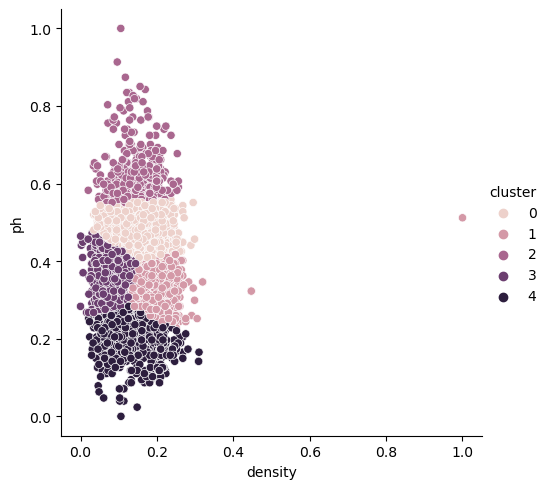

In [10]:
sns.relplot(data=train, x='density', y='ph', hue='cluster')
plt.show()

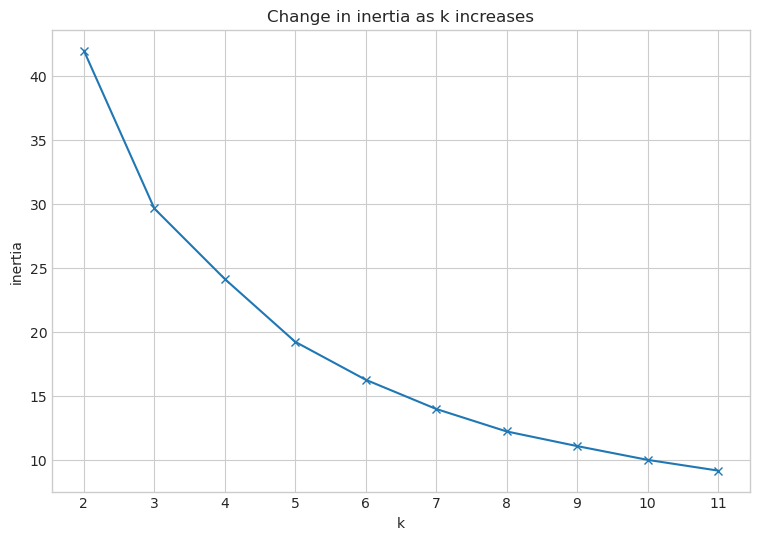

In [11]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')